# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Cep Akil Fikraattausi
- **Email:** cepakil17@gmail.com
- **ID Dicoding:** cep_akil

## Menentukan Pertanyaan Bisnis

*   Pada waktu apa terjadi jumlah penyewaan sepeda terbanyak dan terkecil?
*   Pada musim apa terjadi jumlah penyewaan sepeda tertinggi?
*   Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
*   Seberapa banyak pengguna yang memilih opsi terdaftar (registered) dibandingkan dengan yang tidak terdaftar (casual)?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import Semua Packages/Library yang Digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [13]:
# Load Data Tabel Day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Load Data Tabel Hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
# Memeriksa jenis data dari setiap kolom yang ada dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [6]:
# Pengecekan missing values di dataset hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Pengecekan missing values di dataset day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak ditemukan missing values di kedua dataset


In [11]:
# Memeriksa duplikasi data di kedua dataset
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0
Jumlah duplikasi data:  0


**Insight:**
- Tidak ditemukan duplikasi data di kedua dataset


In [9]:
# Parameter statistik untuk kolom-kolom numerik yang ada dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Parameter statistik untuk kolom-kolom numerik yang ada dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### **Cleaning Data**
* **Menghapus kolom instant dan workingday:** Kolom workingday sudah diwakili oleh weekday, sedangkan kolom instant tidak relevan untuk analisis ini.
* **Mengubah tipe data menjadi kategori:** Kolom-kolom seperti season, mnth, holiday, weekday, dan weathersit akan diubah tipe datanya dari integer menjadi category, karena setiap kolom tersebut memiliki sejumlah nilai yang terbatas dan mewakili kategori.
* **Mengonversi kolom dteday:** Kolom yang awalnya bertipe 'object' akan diubah menjadi 'datetime', untuk memudahkan analisis berbasis waktu.
* **Mengubah nama kolom:** Beberapa kolom akan diganti namanya agar lebih mudah dipahami dan digunakan dalam analisis.
* **Mengonversi nilai kolom:** Kolom-kolom yang memiliki data yang kurang jelas akan dikonversi agar lebih mudah dipahami.
* **Membuat kolom baru category_days:** Kolom ini akan menunjukkan apakah hari tersebut adalah weekend atau weekday, berdasarkan nilai pada kolom weekday.

Drop kolom workdays

In [12]:
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

Mengubah tipe data

In [15]:
# int ke category
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

In [16]:
# object ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mengubah nama kolom (rename) di dataset day_df

In [17]:
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

Mengubah nama kolom (rename) di dataset hour_df

In [18]:
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

Mengonversi kolom season: Mengubah nilai numerik dalam kolom season menjadi nama musim yang lebih mudah dipahami.

In [20]:
day_df['season'] = day_df['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'))
hour_df['season'] = hour_df['season'].replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'))

Mengonversi kolom month: Mengubah angka dalam kolom month menjadi nama bulan yang lebih mudah dipahami.

In [22]:
day_df['month'] = day_df['month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                                           ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
hour_df['month'] = hour_df['month'].replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                                            ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))

Mengonversi kolom weather_situation: Mengubah angka dalam kolom weather_situation menjadi deskripsi kondisi cuaca yang lebih mudah dipahami, seperti 'Clear', 'Misty', 'Light_rainsnow', dan 'Heavy_rainsnow'.

In [24]:
day_df['weather_situation'] = day_df['weather_situation'].replace((1, 2, 3, 4),
                                                                   ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'))
hour_df['weather_situation'] = hour_df['weather_situation'].replace((1, 2, 3, 4),
                                                                    ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'))


Mengonversi kolom one_of_week: Mengubah angka dalam kolom one_of_week menjadi nama hari dalam minggu, seperti 'Sunday', 'Monday', 'Tuesday', dan seterusnya.

In [26]:
day_df['one_of_week'] = day_df['one_of_week'].replace((0, 1, 2, 3, 4, 5, 6),
                                                     ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))
hour_df['one_of_week'] = hour_df['one_of_week'].replace((0, 1, 2, 3, 4, 5, 6),
                                                        ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))


Mengonversi kolom year: Mengubah nilai tahun dalam kolom year dari 0 menjadi '2011' dan 1 menjadi '2012'.

In [27]:
day_df['year'] = day_df['year'].replace((0, 1), ('2011', '2012'))
hour_df['year'] = hour_df['year'].replace((0, 1), ('2011', '2012'))

Menghitung ulang kolom humidity: Mengonversi nilai dalam kolom humidity menjadi persentase dengan mengalikannya dengan 100.

In [28]:
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

Membuat kolom category_days

In [29]:
# Fungsi untuk mengkategorikan hari
def get_category_days(day):
    if day in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

# Menambahkan kolom category_days
hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)


Mengklasifikasikan humdity (kelembaban)

In [30]:
# Fungsi untuk mengklasifikasikan kelembaban
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

# Menambahkan kolom humidity_category ke hour_df dan day_df
hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)


## Exploratory Data Analysis (EDA)

### Explore data pada dataset hour_df

In [31]:
# Parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


**Insight:**
Berdasarkan parameter statistik di atas, dataset mencakup 17.379 entri pelanggan. Penyewaan sepeda paling sering terjadi pada hari biasa (weekday), dengan rata-rata kelembaban sekitar 62.72%. Cuaca cerah ("Clear") mendominasi kondisi cuaca, sementara penyewaan sepeda tertinggi terjadi pada jam 11:54 dengan standar deviasi sebesar 6.91.

In [36]:
# Sewa berdasarkan jam
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
}).sort_values(by=("count_cr", "sum"), ascending=True)

,count_cr
,sum
hours,
4,4428
3,8174
5,14261
2,16352
1,24164
0,39130
6,55132
23,63941


**Insight**: Berdasarkan tabel pivot di atas, diketahui bahwa waktu dengan jumlah penyewaan sepeda tertinggi adalah pada jam 17.00, sedangkan penyewaan sepeda paling rendah terjadi pada jam 04.00.

### Explore data pada dataset day_df

In [37]:
# Parameter statistik dari data day_df
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


* Berdasarkan rangkuman statistik di atas, data mencatatkan 731 entri dengan penyewaan sepeda yang tercatat setiap hari.
* Penyewaan sepeda terbanyak terjadi pada musim gugur, dengan jumlah penyewa tertinggi pada tahun 2012. Rata-rata suhu pada data adalah 62.79°C, dengan kelembapan rata-rata sebesar 62.67%.
* Penyewaan sepeda terbanyak terjadi pada hari Minggu, dengan penyewaan terbanyak tercatat pada kategori "weekdays".

In [40]:
# Jumlah sewa tiap season (musim)
day_df.groupby(by="season", observed=True).count_cr.sum().sort_values(ascending=False).reset_index().head(10)

,season,count_cr
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


Berdasarkan data tersebut, musim fall (gugur) dan summer (panas) memiliki jumlah sewa terbanyak

In [41]:
# melihat jumlah penyewaan tiap tahun berdasarkan user registered dan casual
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Berdasarkan data di atas, total penyewaan sepeda untuk kategori **registered** (pelanggan terdaftar/member) pada tahun 2011 mencapai 995.851, sementara pada tahun 2012 meningkat menjadi 1.676.811. Untuk kategori **casual** (pelanggan tidak terdaftar/non-member), total penyewaan pada tahun 2011 tercatat sebanyak 247.252, dan meningkat pada tahun 2012 menjadi 372.765. Angka ini menunjukkan adanya kenaikan yang signifikan dalam jumlah penyewaan sepeda, baik untuk pelanggan terdaftar maupun tidak terdaftar dari tahun 2011 ke 2012.

## Visualization & Explanatory Analysis
* Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit terjadi?
* Musim apa yang mencatatkan jumlah penyewaan sepeda terbanyak?
* Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
* Sejauh mana pelanggan yang memilih untuk mendaftar (registered) dibandingkan dengan yang tidak terdaftar (casual)?

### Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit terjadi?

In [42]:
# melakukan grouping terhadap hours dan count_cr
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

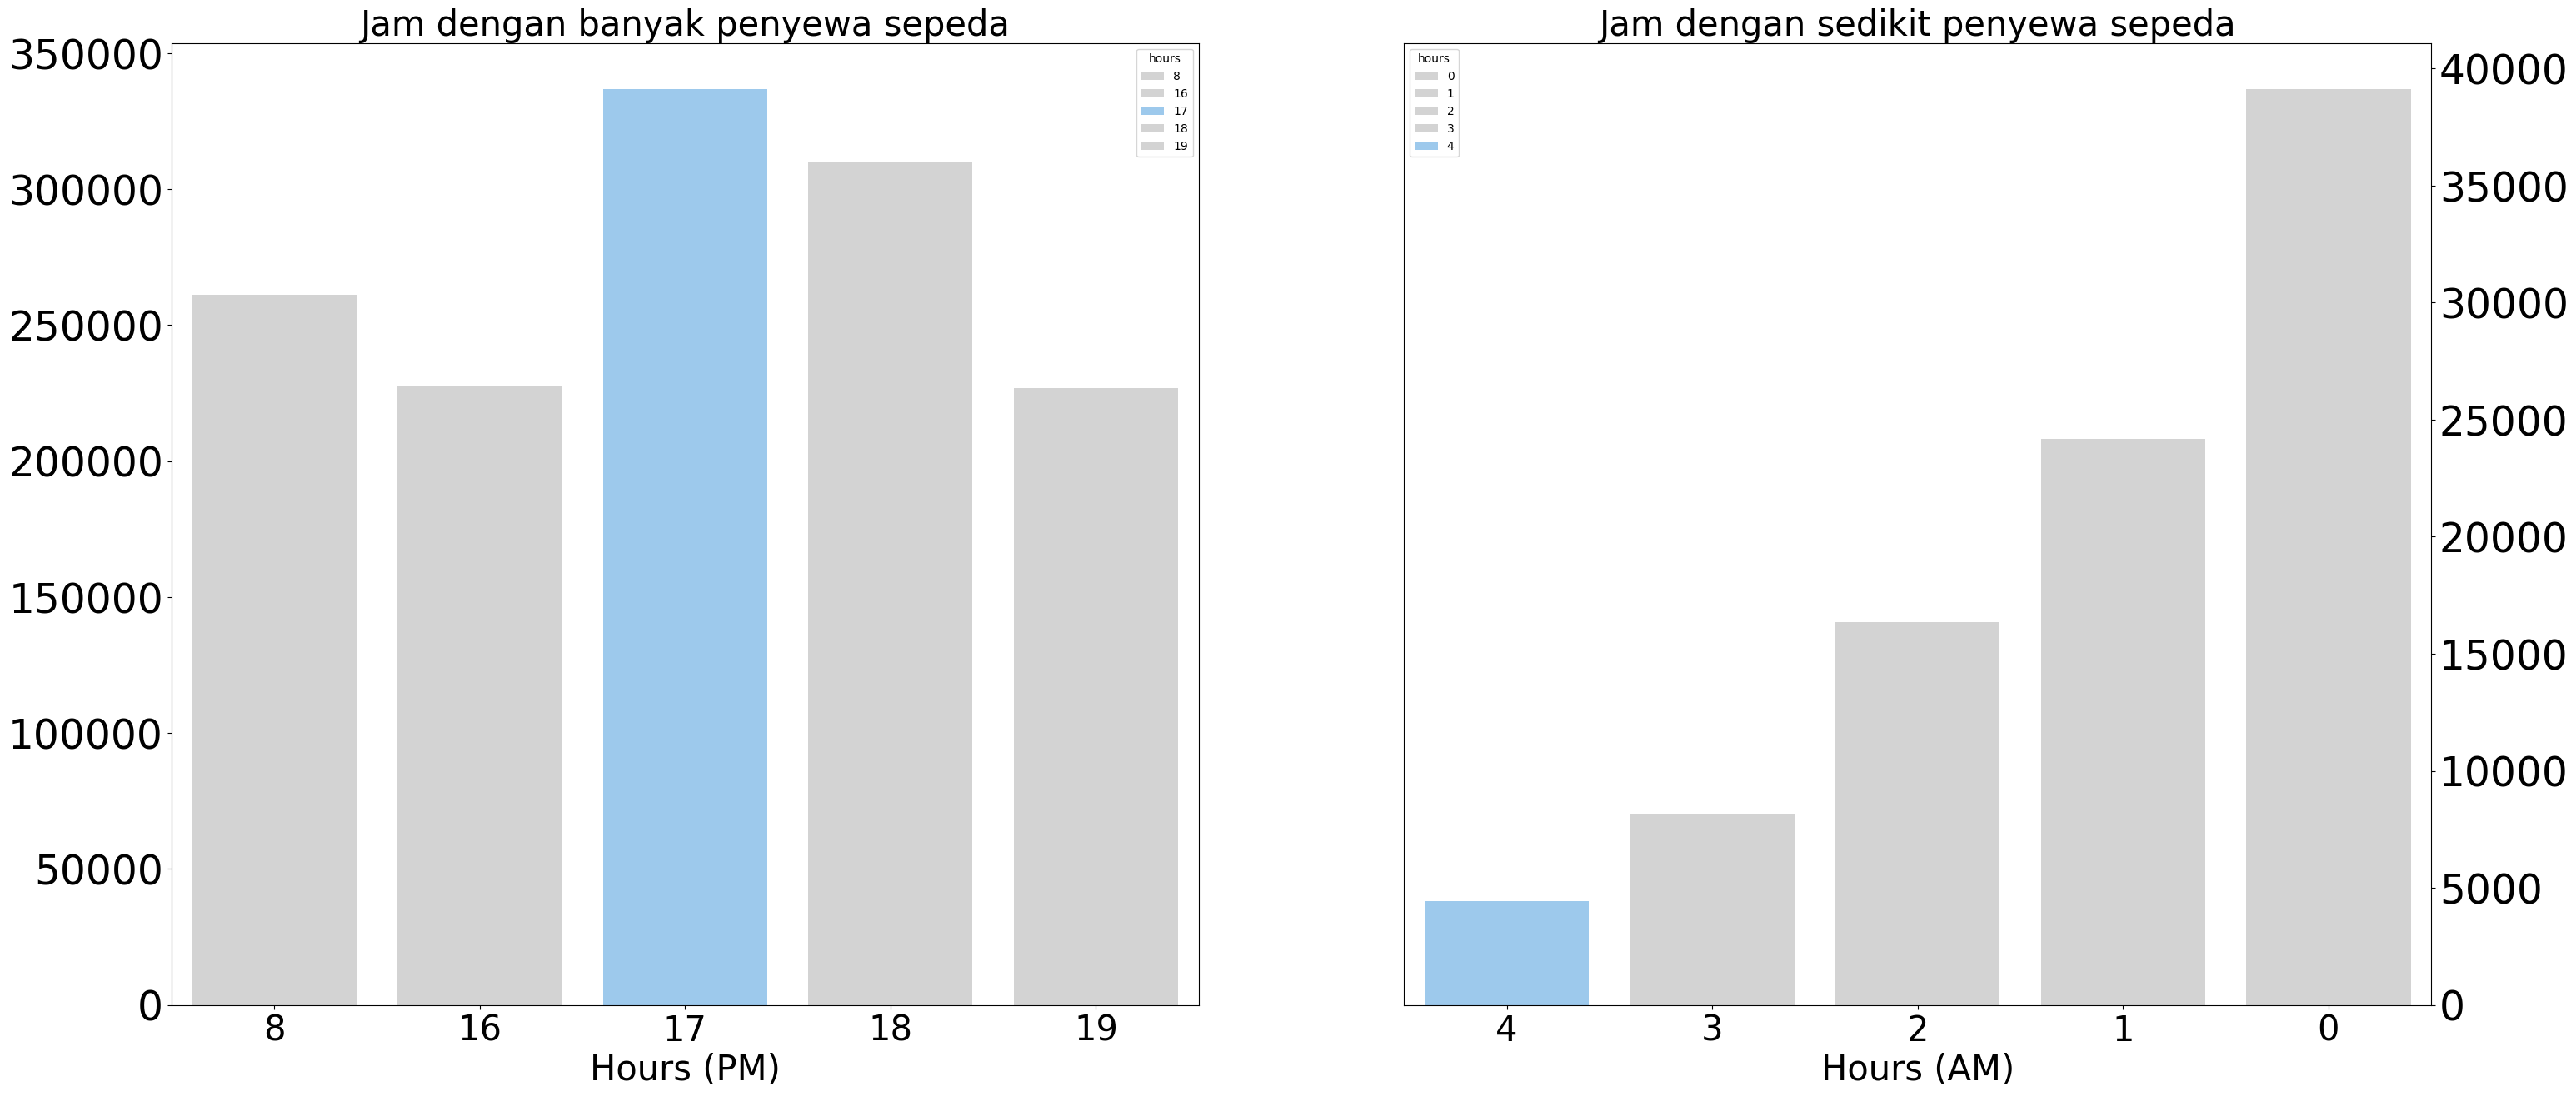

In [45]:
# membuat figure dan axes untuk subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(x="hours", y="count_cr", hue="hours", data=sum_order_items_df.head(5),
            palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(x="hours", y="count_cr", hue="hours", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5),
            palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])

# mengatur label dan judul untuk subplot kedua
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()


Berdasarkan grafik di atas, terlihat bahwa penyewaan sepeda paling tinggi terjadi pada jam 17:00. Sebaliknya, penyewaan sepeda paling sedikit tercatat pada jam 04:00.

### Musim apa yang mencatatkan jumlah penyewaan sepeda terbanyak?

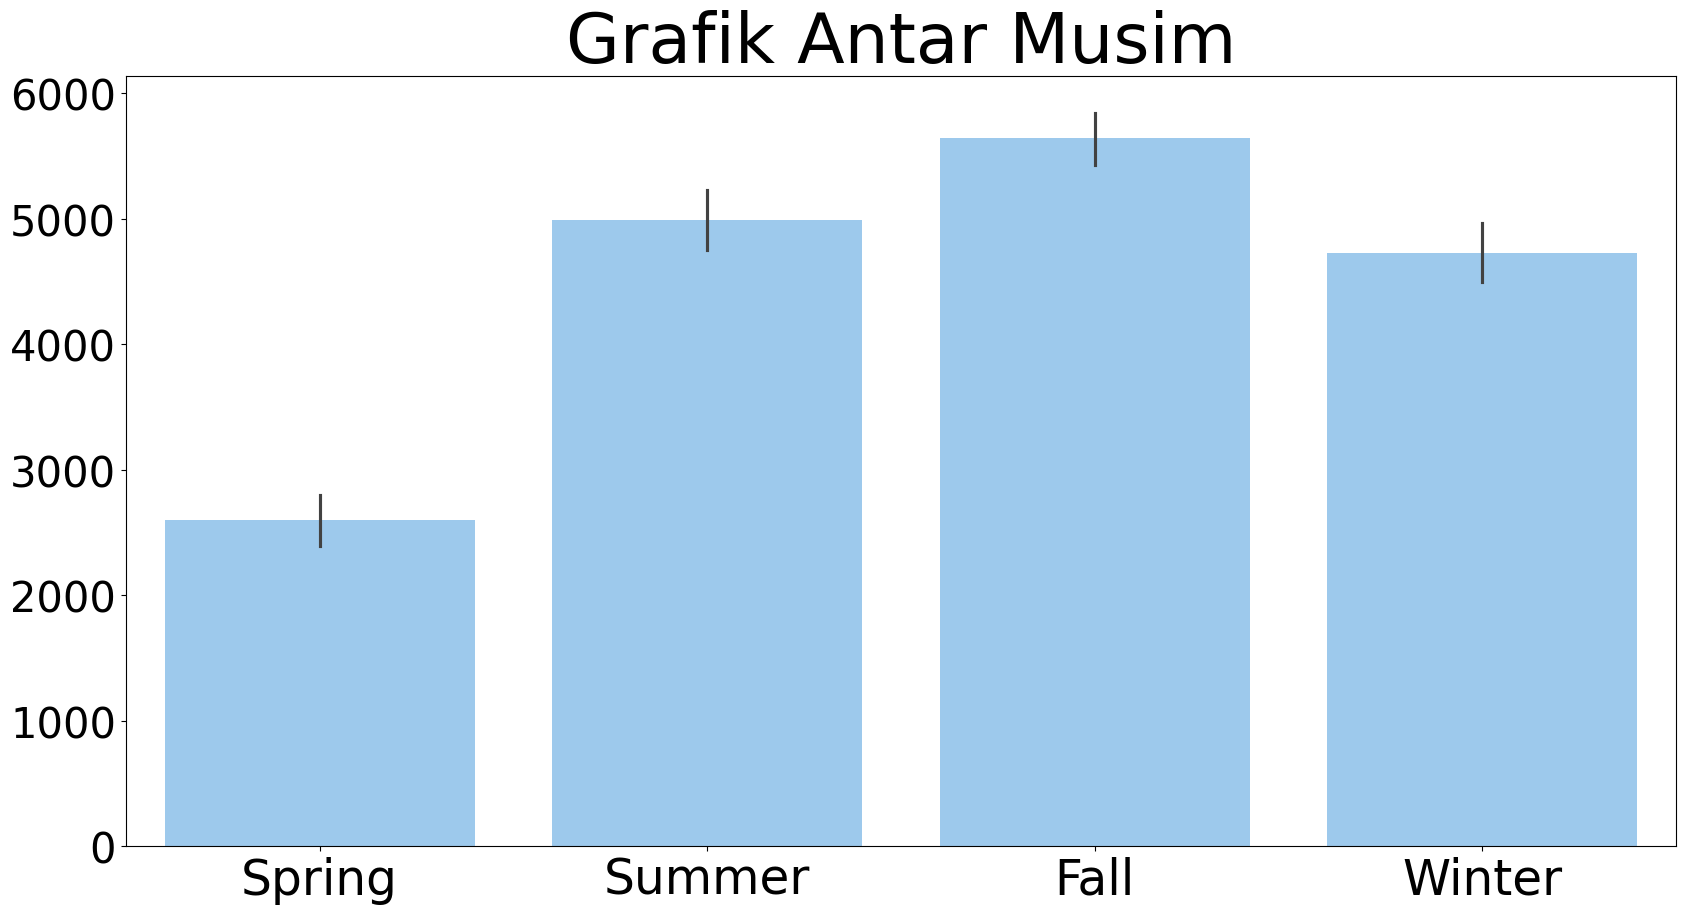

In [48]:
# Warna untuk barplot
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count_cr",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        color="#90CAF9",  # mengganti palette dengan warna tunggal jika tidak ada hue
        ax=ax
    )

# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()


Berdasarkan grafik diatas, musim dengan jumlah penyewaan tertinggi adalah musim fall (gugur)

### Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?

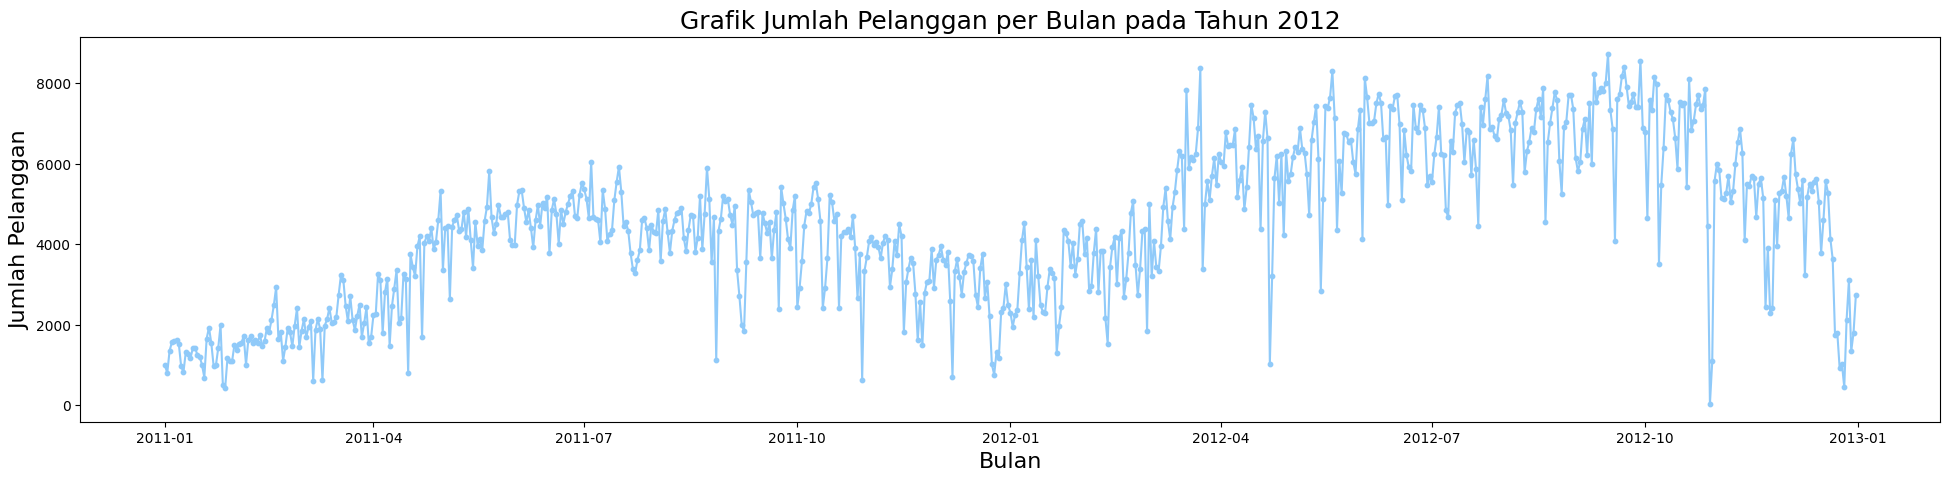

In [50]:
# Mengatur ukuran figure menjadi (24, 5)
plt.figure(figsize=(24, 5))

# Menghitung jumlah maksimum pelanggan per bulan
monthly_counts = day_df['count_cr'].groupby(day_df['dteday']).max()

# Membuat scatter plot dengan warna biru muda dan marker 'o' untuk setiap titik data
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# Menambahkan line plot untuk menghubungkan data pelanggan maksimum setiap bulan
plt.plot(monthly_counts.index, monthly_counts.values, color="#90CAF9")

# Menambahkan label untuk sumbu X dan Y
plt.xlabel('Bulan', fontsize=16)
plt.ylabel('Jumlah Pelanggan', fontsize=16)

# Menambahkan judul pada grafik
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012', fontsize=18)

plt.show()


Berdasarkan grafik yang ditampilkan, terlihat bahwa bulan September mencatatkan jumlah order tertinggi. Sementara itu, bulan November dan Desember menunjukkan penurunan jumlah order yang cukup signifikan dibandingkan dengan bulan-bulan lainnya.

### Sejauh mana perbanduingan pelanggan yang memilih untuk mendaftar (registered) dibandingkan dengan yang tidak terdaftar (casual)?

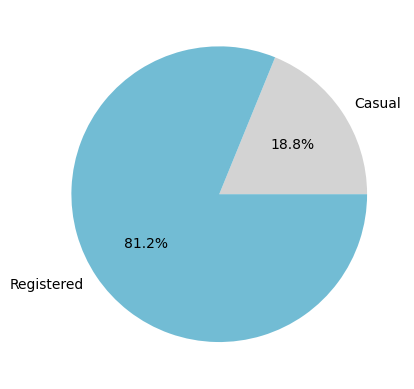

In [51]:
# Menghitung total jumlah pelanggan untuk kategori 'casual' dan 'registered'
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()

# Menyiapkan data untuk diagram pie
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat diagram pie dengan persentase dan warna yang berbeda
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

# Menampilkan diagram pie
plt.show()


Berdasarkan visualisasi pie chart di atas, terlihat bahwa sebanyak 81.2% pelanggan telah melakukan registrasi (registered), sementara 18.8% sisanya merupakan pelanggan yang belum melakukan registrasi (casual).

**Insight:**
- xxx
- xxx

## **Conclusion**

1. Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit terjadi?
* *Jawaban : Penyewaan sepeda paling tinggi terjadi pada jam 17:00. Sebaliknya, penyewaan sepeda paling sedikit tercatat pada jam 04:00.*

2. Musim apa yang mencatatkan jumlah penyewaan sepeda terbanyak?
* *Jawaban : Musim dengan jumlah penyewaan tertinggi adalah musim fall (gugur)*.

3. Bagaimana kinerja penjualan perusahaan dalam beberapa tahun terakhir?
* *Jawaban: Dari visualisasi yang ada, dapat disimpulkan bahwa bulan September 2012 mencatatkan jumlah order tertinggi. Sebaliknya, bulan November dan Desember 2012 menunjukkan penurunan jumlah order yang cukup signifikan dibandingkan dengan bulan lainnya. Selain itu, terlihat juga penurunan yang cukup signifikan pada bulan Januari 2011.*
4. Sejauh mana pelanggan yang memilih untuk mendaftar (registered) dibandingkan dengan yang tidak terdaftar (casual)?
* Jawaban: Ada sebanyak 81.2% pelanggan telah melakukan registrasi (registered), sementara 18.8% sisanya merupakan pelanggan yang belum melakukan registrasi (casual).
*teks yang dimiringkan*

## Analisis Lanjutan

### RFM Analysist
Analisis RFM di bawah ini bertujuan untuk menggali lebih dalam mengenai perilaku pelanggan berdasarkan tiga faktor utama:

* Recency (seberapa baru pelanggan berinteraksi dengan bisnis),
* Frequency (berapa sering pelanggan berinteraksi),
* Monetary (berapa banyak uang yang mereka habiskan).

Dengan pendekatan ini, perusahaan dapat lebih memahami pola perilaku pelanggan dan mengambil langkah yang lebih tepat untuk meningkatkan retensi serta pendapatan.

In [52]:
# Mendapatkan tanggal terbaru dalam data
current_date = max(hour_df['dteday'])

# Melakukan agregasi untuk menghitung nilai Recency, Frequency, dan Monetary
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Menghitung Recency, jarak hari sejak interaksi terakhir
    'instant': 'count',  # Menghitung Frequency, jumlah interaksi pelanggan
    'count_cr': 'sum'  # Menghitung Monetary, total pengeluaran pelanggan
}).reset_index()

# Mengganti nama kolom agar lebih deskriptif
rfm_df.columns = ['Customer_Type', 'Recency', 'Frequency', 'Monetary']

# Menampilkan hasil RFM Analysis
print(rfm_df.head())


   Customer_Type  Recency  Frequency  Monetary
0              0       38         24        35
1              1        0        201       294
2              2        1        245       648
3              3        0        294      1154
4              4        3        307      1602
